In [182]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as nx
import seaborn as sns

Our initial step is to collect and read in all the relevant files into our system. Once we have the complete set of data, our next objective is to merge these individual files into a single comprehensive dataset. Before combining the files, we will carry out thorough data cleaning and processing on each of them to ensure accuracy and consistency in our final output.

# Cab_Data File

In [183]:
df_cab = pd.read_csv("Cab_Data.csv")
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [184]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [185]:
# See if the data has any missing values
missing_cab = df_cab.isnull().sum()
missing_cab

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [186]:
# Convert the 'Date of Travel' column to a datetime object
df_cab['Date of Travel'] = pd.to_datetime(df_cab['Date of Travel'], unit='d', origin='1899-12-30')
print(df_cab.head())

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


Convert to date and time 

In [187]:
# Check unqiue values for column
df_cab['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [188]:
df_cab['Price Charged'].unique()


array([370.95, 358.52, 125.2 , ...,  31.49, 742.24, 620.62])

<AxesSubplot: xlabel='Price Charged'>

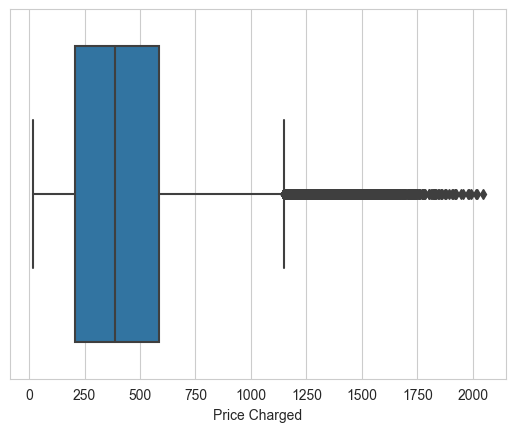

In [189]:
# Check for outliers 
sns.boxplot(x=df_cab['Price Charged'])

Seems to be outliers outisde of 1200 but there is no way to cross refernce this data so we will keep this in

In [190]:
# Check duplicates
cab_duplicates = df_cab[df_cab.duplicated()]

if cab_duplicates.empty:
    print("There are no duplicates in the file.")
else:
    print("There are duplicates in the file.")

There are no duplicates in the file.


In [191]:
# Check all changes have been made
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


# City File

In [192]:
df_city = pd.read_csv("City.csv")
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [193]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [194]:
# See if the data has any missing values
missing_city = df_city.isnull().sum()
missing_city

City          0
Population    0
Users         0
dtype: int64

In [195]:
# Check unqiue values for column
df_city['City'].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

In [196]:
# Check duplicates
city_duplicates = df_city[df_city.duplicated()]

if city_duplicates.empty:
    print("There are no duplicates in the file.")
else:
    print("There are duplicates in the file.")

There are no duplicates in the file.


# Customer_ID File

In [197]:
df_customer = pd.read_csv("Customer_ID.csv")
df_customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [198]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [199]:
missing_customer = df_customer.isnull().sum()
missing_customer 

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [200]:
# Check duplicates
customer_duplicates = df_customer[df_customer.duplicated()]

if customer_duplicates.empty:
    print("There are no duplicates in the file.")
else:
    print("There are duplicates in the file.")

There are no duplicates in the file.


# Transaction_ID File

In [201]:
df_transaction = pd.read_csv('Transaction_ID.csv')
df_transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [202]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [203]:
missing_transaction = df_transaction.isna().sum()
missing_transaction 

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [204]:
# Check duplicates
transaction_duplicates = df_transaction[df_transaction.duplicated()]

if transaction_duplicates.empty:
    print("There are no duplicates in the file.")
else:
    print("There are duplicates in the file.")

There are no duplicates in the file.


Having completed the cleaning and processing of all the data, we are now ready to merge files that share a common key, thereby consolidating the information into a more comprehensive and meaningful dataset.

In [205]:
# join the 'df_cab' + 'df_city' on the 'City' column
joined_df = pd.merge(df_cab, df_city, on='City')
joined_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701"
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001"
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001"
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001"
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001"


In [206]:
joined_df.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Population        0
Users             0
dtype: int64

In [207]:
# join the 'df_customer' + 'df_transaction' on the 'Customer ID' column
joined_df2 = pd.merge(df_customer, df_transaction, on='Customer ID')
joined_df2

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


In [208]:
joined_df2.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Transaction ID        0
Payment_Mode          0
dtype: int64

In [209]:
# join the 2 datasets 'joined_df' + 'joined_df2' on the 'Transaction ID' column
cab_df = pd.merge(joined_df, joined_df2, on='Transaction ID')
cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Male,28,10813,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Male,27,9237,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701",28712,Male,53,11242,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701",28020,Male,23,23327,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701",27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001",52392,Male,24,15651,Cash
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001",53286,Male,32,6528,Cash
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001",52265,Male,56,7966,Cash
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001",52175,Male,32,6423,Card


In [211]:
cab_df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Payment_Mode          0
dtype: int64

In [295]:
# Created new column called 'Year' for analysis
cab_df['Year'] = cab_df['Date of Travel'].dt.year

In [241]:
# Create a new column in the cab dataframe to group the distances travelled into categories
cab_df['Distance Group'] = pd.cut(cab_df['KM Travelled'], bins=[0, 10, 20, 40, float('inf')], labels=['under 10km', '10-19km', '20-39km', 'over 40km'])
cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Year,Distance Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Male,28,10813,Card,2016,20-39km
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Male,27,9237,Card,2016,20-39km
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701",28712,Male,53,11242,Cash,2016,under 10km
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701",28020,Male,23,23327,Cash,2016,20-39km
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701",27182,Male,33,8536,Card,2016,under 10km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001",52392,Male,24,15651,Cash,2018,under 10km
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001",53286,Male,32,6528,Cash,2018,under 10km
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001",52265,Male,56,7966,Cash,2018,20-39km
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001",52175,Male,32,6423,Card,2018,under 10km


We have successfully created the master dataset by merging all four files using a common column, enabling us to consolidate all relevant data into one comprehensive file.

# Analysis

In [242]:
# Datasets for each cab company
pink_df = cab_df[cab_df['Company'] == 'Pink Cab']

yellow_df = cab_df[cab_df['Company'] == 'Yellow Cab']

In [243]:
# Calculate total KM Travelled for each company 
pink_total_km = pink_df['KM Travelled']
yellow_total_km = yellow_df['KM Travelled']

print("Pink Cab total KM:", pink_total_km.sum())
print("Yellow Cab total KM:", yellow_total_km.sum())

Pink Cab total KM: 1911073.1099999999
Yellow Cab total KM: 6199417.47


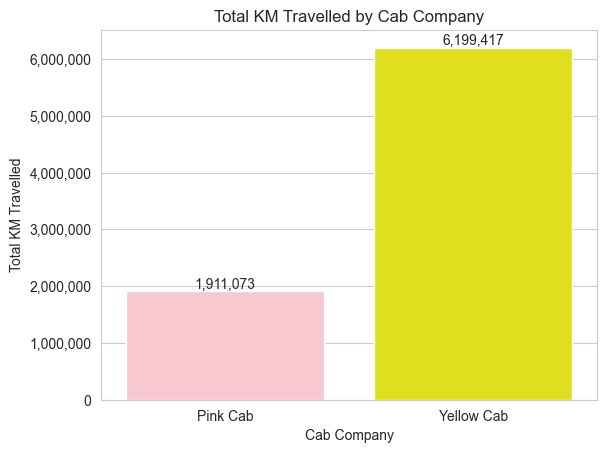

In [244]:
# Set custom color palette
colors = ["#FFC0CB", "#FFFF00"]

# Create a bar plot using SNS
ax = sns.barplot(x=["Pink Cab", "Yellow Cab"], y=[pink_total_km.sum(), yellow_total_km.sum()], palette=colors)

# Format y-axis 
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Add labels and title
plt.xlabel("Cab Company")
plt.ylabel("Total KM Travelled")
plt.title("Total KM Travelled by Cab Company")

# Add values on top of each bar
for p in ax.patches:
    value = "{:,.0f}".format(p.get_height())
    ax.annotate(value,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [245]:
# Calculate total profit for each company 
pink_profit_total = pink_df['Price Charged'] - pink_df['Cost of Trip']
yellow_profit_total = yellow_df['Price Charged'] - yellow_df['Cost of Trip']

print("Pink Cab total profit:", pink_profit_total.sum())
print("Yellow Cab total profit:", yellow_profit_total.sum())

Pink Cab total profit: 5307328.3209999995
Yellow Cab total profit: 44020373.1708


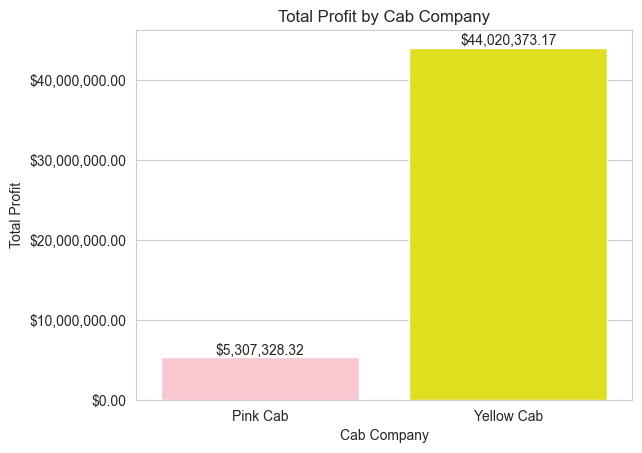

In [246]:
# Create a bar plot using SNS
ax = sns.barplot(x=["Pink Cab", "Yellow Cab"], y=[pink_profit_total.sum(), yellow_profit_total.sum()], palette=colors)

# Format y-axis 
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Add labels and title
plt.xlabel("Cab Company")
plt.ylabel("Total Profit")
plt.title("Total Profit by Cab Company")

# Add values on top of each bar
for p in ax.patches:
    value = "${:,.2f}".format(p.get_height())
    ax.annotate(value,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')


plt.show()

In [247]:
# Total Trips per company
pink_trips = len(pink_df)
yellow_trips = len(yellow_df)

print("Pink Cab total trips:", pink_trips)
print("Yellow Cab total trips:", yellow_trips)

Pink Cab total trips: 84711
Yellow Cab total trips: 274681


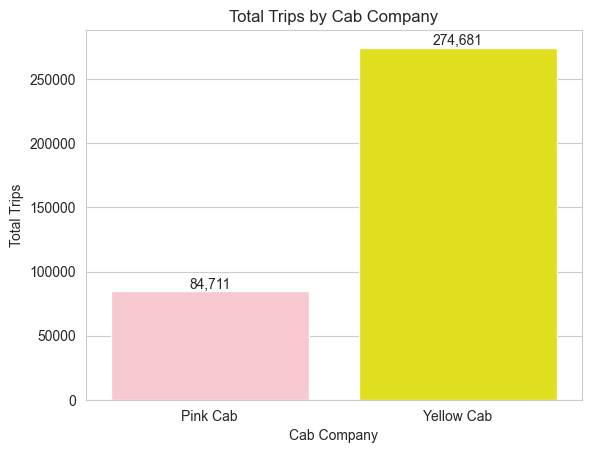

In [248]:
# Create a bar plot using SNS
ax = sns.barplot(x=["Pink Cab", "Yellow Cab"], y=[pink_trips, yellow_trips], palette=colors)

# Add labels and title
plt.xlabel("Cab Company")
plt.ylabel("Total Trips")
plt.title("Total Trips by Cab Company")

# Add values on top of each bar
for p in ax.patches:
    value = "{:,.0f}".format(p.get_height())
    ax.annotate(value,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')


plt.show()

In [249]:
# Avg profit per ride
pink_prof_per_ride = pink_profit_total.sum() / pink_trips
yellow_prof_per_ride = yellow_profit_total.sum() / yellow_trips

print("Pink Cab profit per trip:", pink_prof_per_ride)
print("Yellow Cab profit per trip:", yellow_prof_per_ride)

Pink Cab profit per trip: 62.65217410961976
Yellow Cab profit per trip: 160.25998584103013


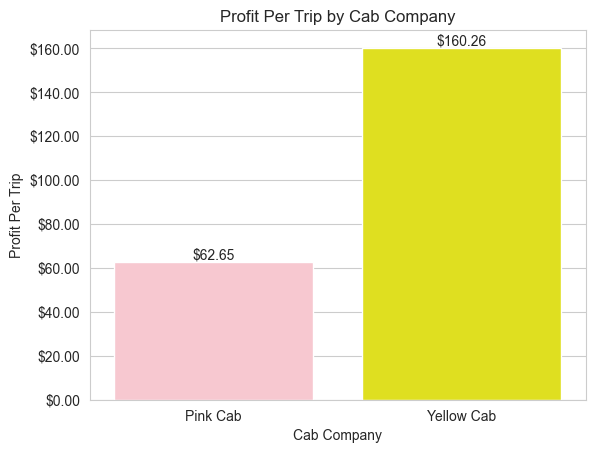

In [250]:
# Create a bar plot using SNS
ax = sns.barplot(x=["Pink Cab", "Yellow Cab"], y=[pink_prof_per_ride, yellow_prof_per_ride], palette=colors)

# Format y-axis 
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Add labels and title
plt.xlabel("Cab Company")
plt.ylabel("Profit Per Trip")
plt.title("Profit Per Trip by Cab Company")

# Add values on top of each bar
for p in ax.patches:
    value = "${:,.2f}".format(p.get_height())
    ax.annotate(value,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')


plt.show()

# Overview of Each Cab Company

In [251]:
# Total Profit 
data = {'Cab Company': ['Pink Cab', 'Yellow Cab'],
        'Total Profit': [5307328.3209999995, 44020373.1708],
        'Total Rides': [84711, 274681],
        'Profit Per Ride': [62.65, 160.25],
        'Total KM Travelled': [1911073, 6199417]}
df = pd.DataFrame(data)

# create a styler object
styler = df.style

# set table properties
styler = styler.set_table_styles([{'selector': 'th',
                                   'props': [('border', '1px solid black'),
                                             ('text-align', 'center')]},
                                  {'selector': 'td',
                                   'props': [('border', '1px solid black')]}])

# format the 'Total Profit' column
styler = styler.format({'Total Profit': '{:,.2f}', 'Total Rides': '{:,.2f}', 'Profit Per Ride': '{:,.2f}', 'Total KM Travelled':'{:,.2f}'})
# render the styled table
styler

,Cab Company,Total Profit,Total Rides,Profit Per Ride,Total KM Travelled
0,Pink Cab,"5,307,328.32","84,711.00",62.65,"1,911,073.00"
1,Yellow Cab,"44,020,373.17","274,681.00",160.25,"6,199,417.00"


In [252]:
# calculate total profit for each company by year
pink_profit_by_year = pink_df.groupby('Year')[['Price Charged', 'Cost of Trip']].sum()
pink_total_profit = pink_profit_by_year['Price Charged'] - pink_profit_by_year['Cost of Trip']

yellow_profit_by_year = yellow_df.groupby('Year')[['Price Charged', 'Cost of Trip']].sum()
yellow_total_profit = yellow_profit_by_year['Price Charged'] - yellow_profit_by_year['Cost of Trip']
yellow_total_profit_formatted = yellow_total_profit.apply(lambda x: '{:.2f}'.format(x)) # Format for more readibility


print("Pink Cab total profit:", pink_total_profit)
print("Yellow Cab total profit:", yellow_total_profit_formatted)

Pink Cab total profit: Year
2016    1713511.224
2017    2033654.908
2018    1560162.189
dtype: float64
Yellow Cab total profit: Year
2016    13926995.43
2017    16575977.97
2018    13517399.77
dtype: object


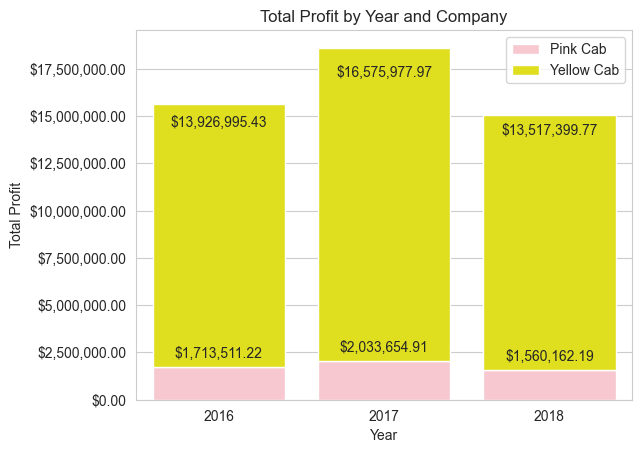

In [253]:
# create a figure and axis object
fig, ax = plt.subplots()

# set the style
sns.set_style('whitegrid')

# stack the pink and yellow bars
sns.barplot(x=pink_total_profit.index, y=pink_total_profit.values, color='#FFC0CB', ax=ax, label='Pink Cab')
sns.barplot(x=yellow_total_profit.index, y=yellow_total_profit.values, color='#FFFF00', ax=ax, bottom=pink_total_profit.values
            ,label='Yellow Cab')

# Format y-axis 
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)


# set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total Profit')
ax.set_title('Total Profit by Year and Company')

# add a legend
ax.legend()

# Add values on top of each bar
for p in ax.patches:
    value = "${:,.2f}".format(p.get_height())
    ax.annotate(value,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

# display the plot
plt.show()


# Analysis of Age 

In [254]:
# Variables of groups of age
age_groups = pd.cut(cab_df['Age'], bins=[0, 20, 30, 50, float('inf')], labels=['under 20', '20-29', '30-49', 'over 50'])
pink_profit_by_age = pink_profit_total.groupby(age_groups).sum() 
yellow_profit_by_age = yellow_profit_total.groupby(age_groups).sum()

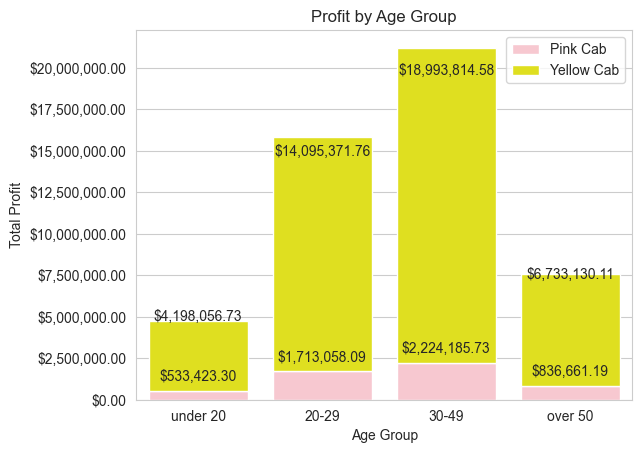

In [255]:
# Create a bar plot using SNS
ax = sns.barplot(x=pink_profit_by_age.index, y=pink_profit_by_age.values, color='#FFC0CB', label='Pink Cab')
sns.barplot(x=yellow_profit_by_age.index, y=yellow_profit_by_age.values, color='#FFFF00', bottom=pink_profit_by_age.values, label='Yellow Cab')

# Format y-axis 
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Add labels and title
plt.title('Profit by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Profit')


plt.legend()

# Add values on top of each bar
for p in ax.patches:
    value = "${:,.2f}".format(p.get_height())
    ax.annotate(value,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

# Analysis of Gender

In [256]:
# Create df so we can group gender by profit
pink_profit_df = pink_df[['Gender', 'Price Charged', 'Cost of Trip', 'Year']].copy()
pink_profit_df['Profit'] = pink_profit_total
yellow_profit_df = yellow_df[['Gender', 'Price Charged', 'Cost of Trip', 'Year']].copy()
yellow_profit_df['Profit'] = yellow_profit_total

In [257]:
# Variables of profit grouped by gender
pink_profit_by_gender = pink_profit_df.groupby('Gender').sum()['Profit']
yellow_profit_by_gender = yellow_profit_df.groupby('Gender').sum()['Profit']

In [258]:
# Variables of yearly profit grouped by gender
pink_yearly_profit_by_gender = pink_profit_df.groupby(['Year','Gender']).sum()['Profit'].reset_index()
yellow_yearly_profit_by_gender = yellow_profit_df.groupby(['Year','Gender']).sum()['Profit'].reset_index()

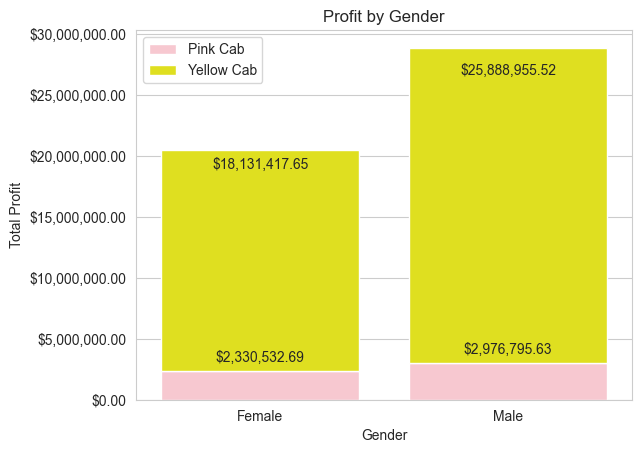

In [259]:
# Create a bar plot using SNS
ax = sns.barplot(x=pink_profit_by_gender.index, y=pink_profit_by_gender.values, color='#FFC0CB', label='Pink Cab')
sns.barplot(x=yellow_profit_by_gender.index, y=yellow_profit_by_gender.values, color='#FFFF00', bottom=pink_profit_by_gender.values, label='Yellow Cab')

# Format y-axis 
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Add labels and title
plt.title('Profit by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Profit')


plt.legend()

# Add values on top of each bar
for p in ax.patches:
    value = "${:,.2f}".format(p.get_height())
    ax.annotate(value,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

# Analysis of Income

In [260]:
income_groups = pd.cut(cab_df['Income (USD/Month)'], bins=[0, 4500, 13000, float('inf')], labels=['Low Income', 'Middle Income', 'High Income'])
pink_profit_by_income =  pink_profit_total.groupby(income_groups).sum() 
yellow_profit_by_income =  yellow_profit_total.groupby(income_groups).sum() 

I have categorized the incomes into three groups based on a rough guide I found on the following website: https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system. The categories I used were low, middle, and upper income. It's important to note that this is just a general guideline and shouldn't be taken as a definitive measure.

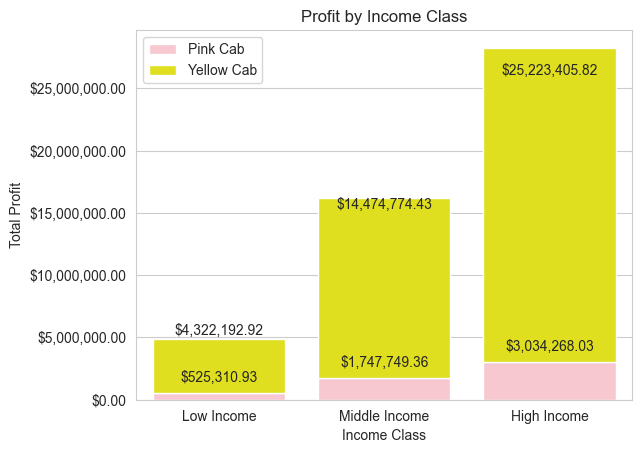

In [261]:
# Create a bar plot using SNS
ax = sns.barplot(x=pink_profit_by_income.index, y=pink_profit_by_income.values, color='#FFC0CB', label='Pink Cab')
sns.barplot(x=yellow_profit_by_income.index, y=yellow_profit_by_income.values, color='#FFFF00', bottom=pink_profit_by_income.values, label='Yellow Cab')

# Format y-axis 
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Add labels and title 
plt.title('Profit by Income Class')
plt.xlabel('Income Class')
plt.ylabel('Total Profit')


plt.legend()

# Add values on top of each bar
for p in ax.patches:
    value = "${:,.2f}".format(p.get_height())
    ax.annotate(value,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 11),
                textcoords='offset points')

plt.show()

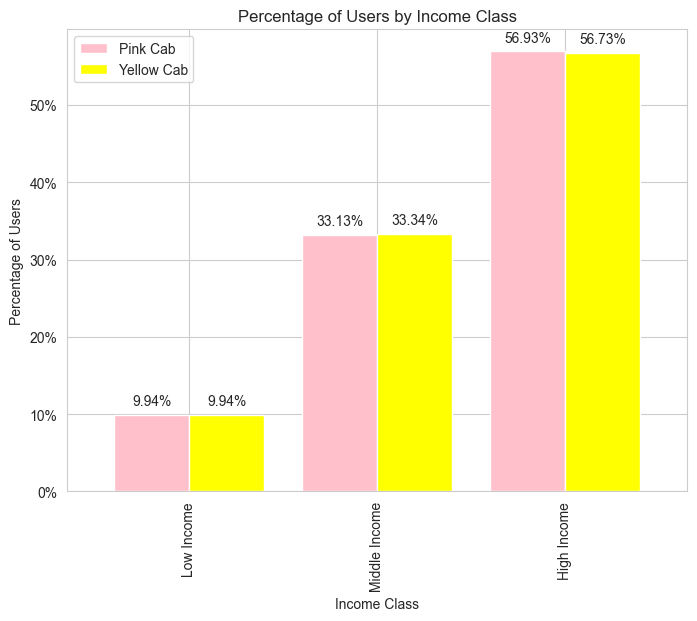

In [262]:
# Count the number of users in each income group for each cab
pink_users_by_income = pink_df.groupby(income_groups)['Company'].count()
yellow_users_by_income = yellow_df.groupby(income_groups)['Company'].count()

# Calculate the total number of users for each cab
pink_total_income_users = pink_users_by_income.sum()
yellow_total_income_users = yellow_users_by_income.sum()

# Calculate the percentage of users in each income group for each cab
pink_pct_users_by_income = pink_users_by_income / pink_total_income_users * 100
yellow_pct_users_by_income = yellow_users_by_income / yellow_total_income_users * 100

# Combine the data into a single DataFrame
users_by_income_df = pd.DataFrame({'Pink Cab': pink_pct_users_by_income, 'Yellow Cab': yellow_pct_users_by_income})

# Create the bar chart
sns.set_style("whitegrid")
ax = users_by_income_df.plot(kind='bar', figsize=(8,6), color=['#FFC0CB', '#FFFF00'], width=0.8)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add labels and title
plt.title('Percentage of Users by Income Class')
plt.xlabel('Income Class')
plt.ylabel('Percentage of Users')
plt.legend(labels=['Pink Cab', 'Yellow Cab'])

# Add values on top of each bar
for p in ax.patches:
    value = "{:.2f}%".format(p.get_height())
    ax.annotate(value,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()


# Analysis of Payments

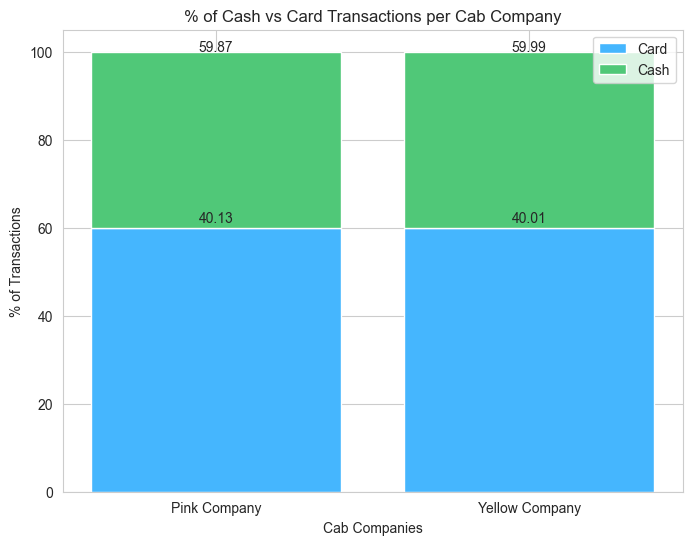

In [263]:
# Calculate the percentage of cash and card transactions for each cab company
pink_pct_payment = pink_df.groupby('Company').Payment_Mode.value_counts(normalize=True) * 100
yellow_pct_payment = yellow_df.groupby('Company').Payment_Mode.value_counts(normalize=True) * 100

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(['Pink Company'], pink_pct_payment['Pink Cab', 'Card'], label='Card', color='#45b6fe')
ax.bar(['Pink Company'], pink_pct_payment['Pink Cab', 'Cash'], bottom=pink_pct_payment['Pink Cab', 'Card'], label='Cash', color='#50c878')
ax.bar(['Yellow Company'], yellow_pct_payment['Yellow Cab', 'Card'], label='Card', color='#45b6fe')
ax.bar(['Yellow Company'], yellow_pct_payment['Yellow Cab', 'Cash'], bottom=yellow_pct_payment['Yellow Cab', 'Card'], label='Cash', color='#50c878')

ax.set_xlabel('Cab Companies')
ax.set_ylabel('% of Transactions')
ax.set_title('% of Cash vs Card Transactions per Cab Company')
ax.legend(labels=['Card', 'Cash'])

# Add values on top of each bar
# Created if statment as the they weere not on top of each bar
for i, p in enumerate(ax.patches):
    value = "{:,.2f}".format(p.get_height())
    if i % 2 == 0:
        offset = 130
    else:
        offset = 70
    ax.annotate(value,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, offset),
                textcoords='offset points')

plt.show()

In [264]:
# Datasets for each cab company new copy
# Created new pink and yellow df so we can have new columns added to original df
pink_df1 = cab_df[cab_df['Company'] == 'Pink Cab']

yellow_df1 = cab_df[cab_df['Company'] == 'Yellow Cab']

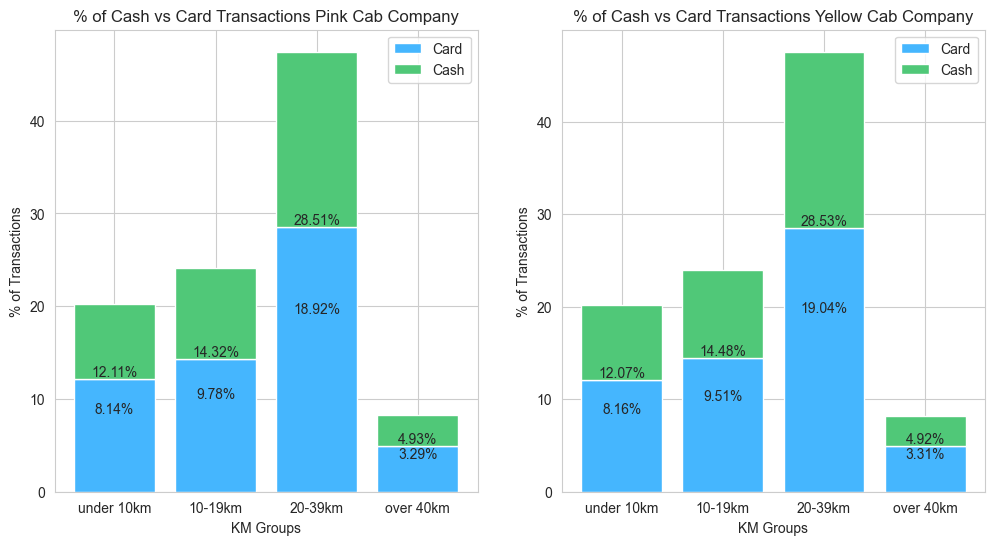

In [294]:
# Calculate the percentage of cash and card transactions for each cab company and distance group
pink_payment_km = pink_df1.groupby(['Company', 'Payment_Mode', 'Distance Group']).size().div(len(pink_df1)) * 100
yellow_payment_km = yellow_df1.groupby(['Company', 'Payment_Mode', 'Distance Group']).size().div(len(yellow_df1)) * 100

# Create two subplots, one for Pink Company and the other for Yellow Company
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pink Company bars
ax1.bar(['under 10km'], pink_payment_km['Pink Cab', 'Card', 'under 10km'], label='Card', color='#45b6fe')
ax1.bar(['under 10km'], pink_payment_km['Pink Cab', 'Cash', 'under 10km'], bottom=pink_payment_km['Pink Cab', 'Card', 'under 10km'], label='Cash', color='#50c878')
ax1.bar(['10-19km'], pink_payment_km['Pink Cab', 'Card', '10-19km'], label='Card',color='#45b6fe')
ax1.bar(['10-19km'], pink_payment_km['Pink Cab', 'Cash', '10-19km'], bottom=pink_payment_km['Pink Cab', 'Card', '10-19km'], color='#50c878')
ax1.bar(['20-39km'], pink_payment_km['Pink Cab', 'Card', '20-39km'], label='Card',color='#45b6fe')
ax1.bar(['20-39km'], pink_payment_km['Pink Cab', 'Cash', '20-39km'], bottom=pink_payment_km['Pink Cab', 'Card', '20-39km'], color='#50c878')
ax1.bar(['over 40km'], pink_payment_km['Pink Cab', 'Card', 'over 40km'], label='Card', color='#45b6fe')
ax1.bar(['over 40km'], pink_payment_km['Pink Cab', 'Cash', 'over 40km'], bottom=pink_payment_km['Pink Cab', 'Card', 'over 40km'], color='#50c878')

# Yellow Company bars
ax2.bar(['under 10km'], yellow_payment_km['Yellow Cab', 'Card', 'under 10km'], label='Card', color='#45b6fe')
ax2.bar(['under 10km'], yellow_payment_km['Yellow Cab', 'Cash', 'under 10km'], bottom=yellow_payment_km['Yellow Cab', 'Card', 'under 10km'], label='Cash', color='#50c878')
ax2.bar(['10-19km'], yellow_payment_km['Yellow Cab', 'Card', '10-19km'], label='Card', color='#45b6fe')
ax2.bar(['10-19km'], yellow_payment_km['Yellow Cab', 'Cash', '10-19km'], bottom=yellow_payment_km['Yellow Cab', 'Card', '10-19km'], color='#50c878')
ax2.bar(['20-39km'], yellow_payment_km['Yellow Cab', 'Card', '20-39km'], label='Card', color='#45b6fe')
ax2.bar(['20-39km'], yellow_payment_km['Yellow Cab', 'Cash', '20-39km'], bottom=yellow_payment_km['Yellow Cab', 'Card', '20-39km'], color='#50c878')
ax2.bar(['over 40km'], yellow_payment_km['Yellow Cab', 'Card', 'over 40km'], label='Card', color='#45b6fe')
ax2.bar(['over 40km'], yellow_payment_km['Yellow Cab', 'Cash', 'over 40km'], bottom=yellow_payment_km['Yellow Cab', 'Card', 'over 40km'], color='#50c878')

ax1.set_xlabel('KM Groups')
ax1.set_ylabel('% of Transactions')
ax1.set_title('% of Cash vs Card Transactions Pink Cab Company')
ax1.legend(labels=['Card', 'Cash'])

ax2.set_xlabel('KM Groups')
ax2.set_ylabel('% of Transactions')
ax2.set_title('% of Cash vs Card Transactions Yellow Cab Company')
ax2.legend(labels=['Card', 'Cash'])


# Add values on top of each first bar 
for p in ax1.patches:
    value = "{:.2f}%".format(p.get_height())
    ax1.annotate(value,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
    
# Add values on top of each second bar
for p in ax2.patches:
    value = "{:.2f}%".format(p.get_height())
    ax2.annotate(value,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

In [274]:
print(pink_payment_km)
print(yellow_payment_km)

Company   Payment_Mode  Distance Group
Pink Cab  Card          under 10km        12.114129
                        10-19km           14.319274
                        20-39km           28.505153
                        over 40km          4.934424
          Cash          under 10km         8.141800
                        10-19km            9.777951
                        20-39km           18.920801
                        over 40km          3.286468
dtype: float64
Company     Payment_Mode  Distance Group
Yellow Cab  Card          under 10km        12.068545
                          10-19km           14.478249
                          20-39km           28.527638
                          over 40km          4.916976
            Cash          under 10km         8.155278
                          10-19km            9.509213
                          20-39km           19.035172
                          over 40km          3.308929
dtype: float64


I have printed to show how similiar both groups are as looking at the bar charts they almost look indentical

# Analysis of Trips Per Customer

In [298]:
# Count the number of unique Customer IDs
num_trips_per_customer = cab_df['Customer ID'].value_counts()
num_trips_per_customer

494      54
2939     53
1070     51
2766     51
944      50
         ..
21682     1
37833     1
21364     1
23004     1
55009     1
Name: Customer ID, Length: 46148, dtype: int64

In [306]:
only_one = num_trips_per_customer <= 1
two_rides = num_trips_per_customer > 1
five_rides = num_trips_per_customer >= 5 
ten_rides = num_trips_per_customer >= 10
fiveteen_rides = num_trips_per_customer >= 15
print(only_one.sum())
print(two_rides.sum())
print(five_rides.sum())
print(ten_rides.sum())
print(fiveteen_rides.sum())

11442
34706
19129
13608
9149


In [314]:
# Create list of all variables
ride_trips = [only_one, two_rides, five_rides, ten_rides, fiveteen_rides]
# Count the number of users in each income group for each cab
pink_rides = pink_df.groupby(ride_trips)['Company'].count()
yellow_rides = yellow_df.groupby(ride_trips)['Company'].count()

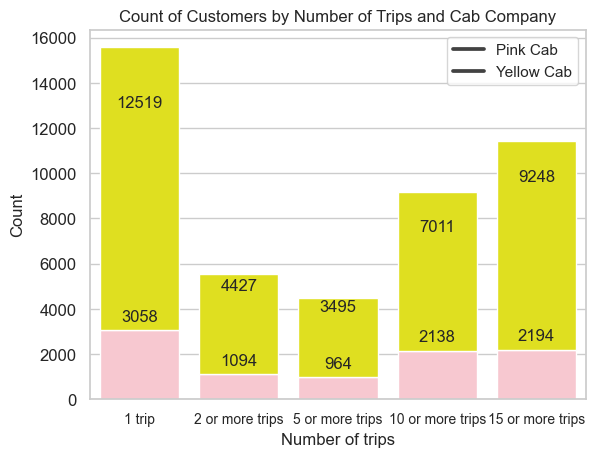

In [365]:
# Create a bar chart using seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x=index, y=pink_rides, color='#FFC0CB')
ax = sns.barplot(x=index, y=yellow_rides, color='#FFFF00', bottom=pink_rides)
ax.set(xlabel='Number of trips', ylabel='Count', title='Count of Customers by Number of Trips and Cab Company')
ax.legend(['Pink Cab', 'Yellow Cab'])


# Add values on top of each bar
for p in ax.patches:
    value = "{:.0f}".format(p.get_height())
    ax.annotate(value,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

    
# Set the font size of the x-axis and y-axis labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)


plt.show()